# PROFESSIONAL CERTIFICATE IN MACHINE LEARNING AND ARTIFICAL INTELLIGENCE - CAPSTONE PART 1

### LIBRARIES AND DATA:

In [1]:
# IMPORT DATA LIBRARIES 
import numpy as np 
import pandas as pd 

# IMPORT VIS LIBRARIES 
import seaborn as sns 
import matplotlib.pyplot as plt 

# IMPORT MODELLING LIBRARIES 
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report,confusion_matrix, precision_score, accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, make_scorer, recall_score, roc_auc_score, roc_curve, auc  
from sklearn.pipeline import Pipeline

In [2]:
cardiac_base=pd.read_csv('data/cardio_train.csv', sep = ';')
cardiac_base.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [3]:
cardiac_base.set_index('id', inplace=True)

In [4]:
cardiac_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


### TRANSFORMATIONS:

In [5]:
cardiac = cardiac_base.loc[(cardiac_base['height'] >= 140) & (cardiac_base['height'] <= 200) & (cardiac_base['weight'] >= 45) & (cardiac_base['ap_hi'] >= 90) & (cardiac_base['ap_hi'] <= 180) & (cardiac_base['ap_lo'] >= 60) & (cardiac_base['ap_lo'] <= 120),['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
cardiac

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [6]:
cardiac['age_yr']=round(cardiac['age']/365.25,2)
cardiac

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.36
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.38
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.63
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.25
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.68
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.88
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.20


### EXPLORATORY ANALYSIS:

In [7]:
cardiac['sex'] = np.where(cardiac['gender'] == 1, 'Female', 'Male')

conditions_chol = [(cardiac['cholesterol'] == 1), (cardiac['cholesterol'] == 2), (cardiac['cholesterol'] == 3)] 
conditions_gluc = [(cardiac['gluc'] == 1), (cardiac['gluc'] == 2), (cardiac['gluc'] == 3)]
conditions_smoke = [(cardiac['smoke'] == 0), (cardiac['smoke'] == 1)]
conditions_alco = [(cardiac['alco'] == 0), (cardiac['alco'] == 1)]
conditions_active = [(cardiac['active'] == 0), (cardiac['active'] == 1)]
conditions_cardio = [(cardiac['cardio'] == 0), (cardiac['cardio'] == 1)]

# create a list of the values we want to assign for each condition
values_col_gluc = ['Normal', 'Above Normal', 'Well Above Normal']
values_y_n = ['No', 'Yes']
values_cardio = ['Absence', 'Presence']

# create a new column and use np.select to assign values to it using our lists as arguments
cardiac['chol'] = np.select(conditions_chol, values_col_gluc)
cardiac['glucose'] = np.select(conditions_gluc, values_col_gluc)
cardiac['smoking'] = np.select(conditions_smoke, values_y_n)
cardiac['alcohol'] = np.select(conditions_alco, values_y_n)
cardiac['phys_activity'] = np.select(conditions_active, values_y_n)
cardiac['target'] = np.select(conditions_cardio, values_cardio)
cardiac

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr,sex,chol,glucose,smoking,alcohol,phys_activity,target
id,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.36,Male,Normal,Normal,No,No,Yes,Absence
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.38,Female,Well Above Normal,Normal,No,No,Yes,Presence
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.63,Female,Well Above Normal,Normal,No,No,No,Presence
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.25,Male,Normal,Normal,No,No,Yes,Presence
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.84,Female,Normal,Normal,No,No,No,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.68,Male,Normal,Normal,Yes,No,Yes,Absence
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.88,Female,Above Normal,Above Normal,No,No,Yes,Presence
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.20,Male,Well Above Normal,Normal,No,Yes,No,Presence


#### Target Counts:

In [8]:
target_counts = cardiac['target'].value_counts()
print(target_counts)

target
Absence     34250
Presence    33525
Name: count, dtype: int64


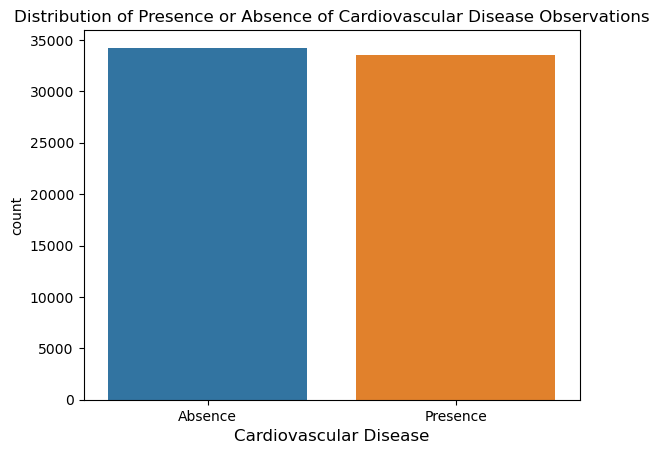

In [9]:
sns.countplot(data=cardiac, x = 'target')
plt.title('Distribution of Presence or Absence of Cardiovascular Disease Observations')
plt.xlabel('Cardiovascular Disease', size=12)

plt.savefig('images/Target_Proportions.png')

#### Cholesterol Counts:

In [10]:
chol_counts = cardiac['chol'].value_counts()
print(chol_counts)

chol
Normal               50879
Above Normal          9133
Well Above Normal     7763
Name: count, dtype: int64


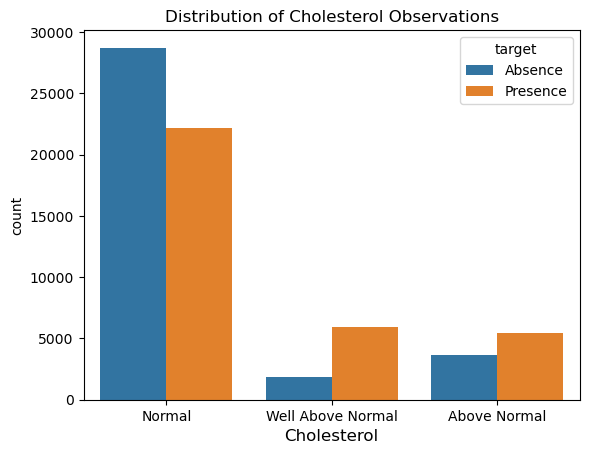

In [11]:
sns.countplot(data=cardiac, x = 'chol', hue="target")
plt.title('Distribution of Cholesterol Observations')
plt.xlabel('Cholesterol', size=12)

plt.savefig('images/Cholesterol_Proportions.png')

#### Glucose Counts:

In [12]:
gluc_counts = cardiac['glucose'].value_counts()
print(gluc_counts)

glucose
Normal               57646
Well Above Normal     5156
Above Normal          4973
Name: count, dtype: int64


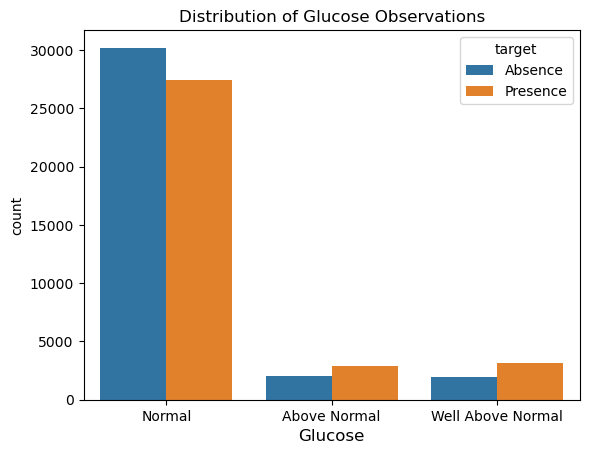

In [13]:
sns.countplot(data=cardiac, x = 'glucose', hue="target")
plt.title('Distribution of Glucose Observations')
plt.xlabel('Glucose', size=12)

plt.savefig('images/Glucose_Proportions.png')

#### Smoking Counts:

In [14]:
smoke_counts = cardiac['smoking'].value_counts()
print(smoke_counts)

smoking
No     61815
Yes     5960
Name: count, dtype: int64


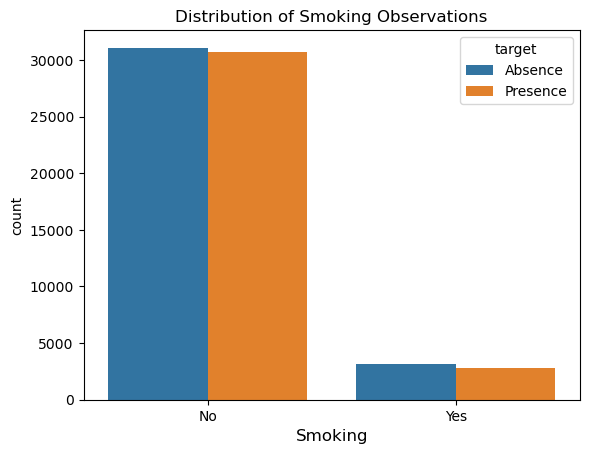

In [15]:
sns.countplot(data=cardiac, x = 'smoking', hue="target")
plt.title('Distribution of Smoking Observations')
plt.xlabel('Smoking', size=12)

plt.savefig('images/Smoking_Proportions.png')

#### Alcohol Intake Counts:

In [16]:
alcohol_counts = cardiac['alcohol'].value_counts()
print(alcohol_counts)

alcohol
No     64166
Yes     3609
Name: count, dtype: int64


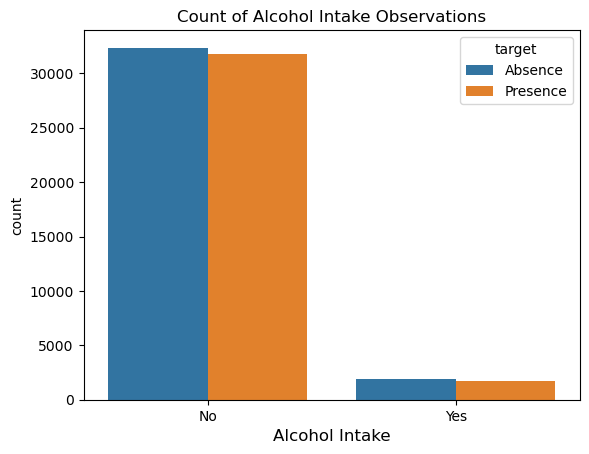

In [17]:
sns.countplot(data=cardiac, x = 'alcohol', hue="target")
plt.title('Count of Alcohol Intake Observations')
plt.xlabel('Alcohol Intake', size=12)

plt.savefig('images/Alcohol_Proportions.png')

#### Physical Activity Counts:

In [18]:
activity_counts = cardiac['phys_activity'].value_counts()
print(activity_counts)

phys_activity
Yes    54453
No     13322
Name: count, dtype: int64


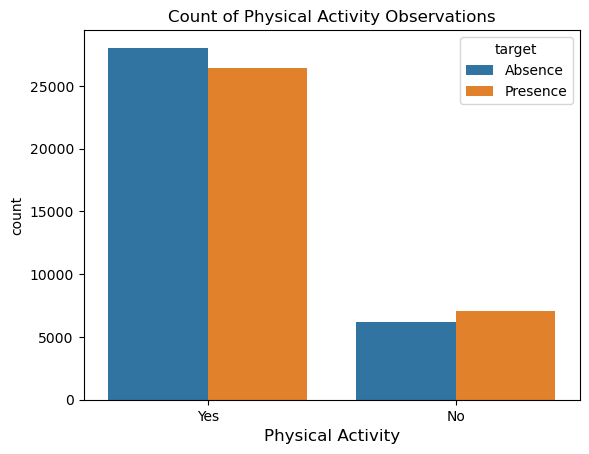

In [19]:
sns.countplot(data=cardiac, x = 'phys_activity', hue="target")
plt.title('Count of Physical Activity Observations')
plt.xlabel('Physical Activity', size=12)

plt.savefig('images/Physical_Activity_Proportions.png')

#### Distribution of Age(years):

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


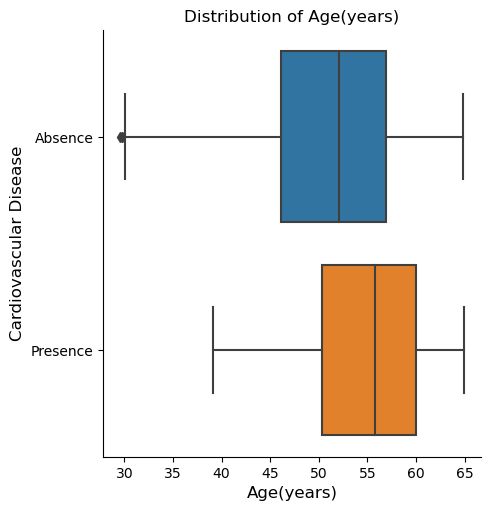

In [20]:
sns.catplot(data=cardiac, x="age_yr", y="target", kind="box")
plt.title('Distribution of Age(years)')
plt.xlabel('Age(years)', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/Age_Distribution.png')

#### Distribution of Height(cm):

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


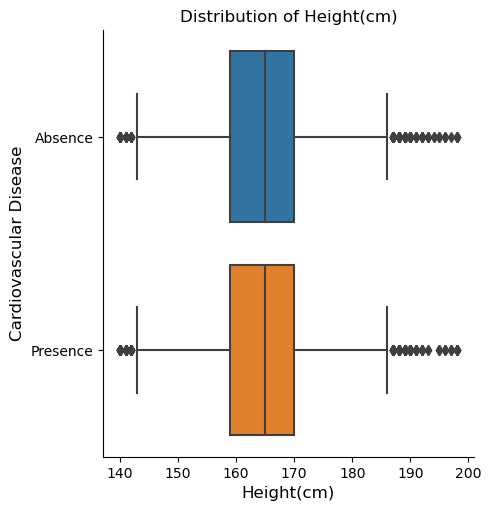

In [21]:
sns.catplot(data=cardiac, x="height", y="target", kind="box")
plt.title('Distribution of Height(cm)')
plt.xlabel('Height(cm)', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/Height_Distribution.png')

#### Distribution of Weight(kg):

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


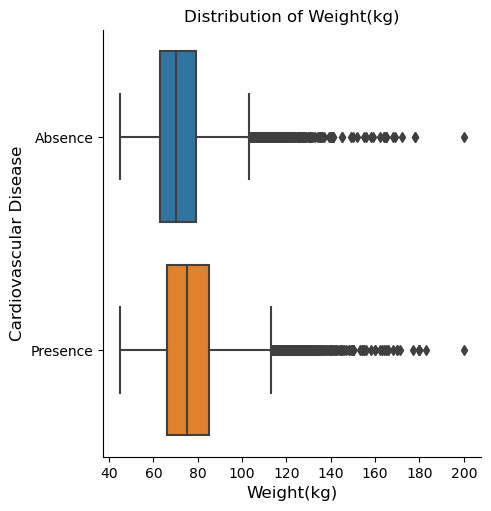

In [22]:
sns.catplot(data=cardiac, x="weight", y="target", kind="box")
plt.title('Distribution of Weight(kg)')
plt.xlabel('Weight(kg)', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/Weight_Distribution.png')

#### Distribution of Systolic Blood Pressure:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


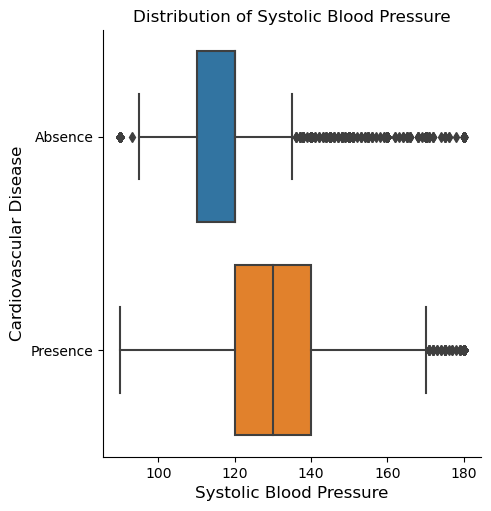

In [23]:
sns.catplot(data=cardiac, x="ap_hi", y="target", kind="box")
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/SysBP_Distribution.png')

#### Distribution of Diastolic Blood Pressure:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


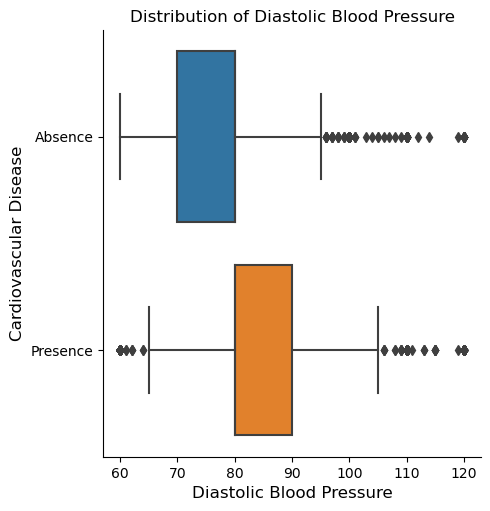

In [24]:
sns.catplot(data=cardiac, x="ap_lo", y="target", kind="box")
plt.title('Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure', size=12)
plt.ylabel('Cardiovascular Disease', size=12)

plt.savefig('images/DiasBP_Distribution.png')

### LOGISTIC REGRESSION:

In [25]:
cardiac_logreg=cardiac[['age_yr', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

In [26]:
cardiac_logreg

,age_yr,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,47.84,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.68,2,168,76.0,120,80,1,1,1,0,1,0
99995,61.88,1,158,126.0,140,90,2,2,0,0,1,1
99996,52.20,2,183,105.0,180,90,3,1,0,1,0,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(cardiac_logreg.drop('cardio', axis = 1), cardiac_logreg.cardio, 
                                                    random_state = 42)

In [28]:
selector = make_column_selector(dtype_include=object)

In [29]:
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())

In [30]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [31]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_pipe.fit(X_train, y_train)

pipe_1_acc = lgr_pipe.score(X_test, y_test)

In [32]:
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out() 
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

coef_df.head(20)

,feature,coefs
4,ap_hi,0.939719
0,age_yr,0.346686
6,cholesterol,0.339368
3,weight,0.161805
5,ap_lo,0.096354
10,active,0.078281
7,gluc,0.071296
9,alco,0.051103
2,height,0.043983
8,smoke,0.042280


### PRECISION, ACCURACY, RECALL, ROC_AUC, TRAINING ACCURACY AND TEST ACCURACY:

In [33]:
preds = lgr_pipe.predict(X_test)
y_prob = lgr_pipe.predict_proba(X_test)[:, 1]
accuracy_log = accuracy_score(y_test, preds)
precision_log = precision_score(y_test, preds)
recall_log = recall_score(y_test, preds)
roc_auc_log = roc_auc_score(y_test, y_prob)
### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy_log: .2f}\nPrecision: {precision_log: .2f}\nRecall: {recall_log: .2f}\nRoc_AUC: {roc_auc_log: .2f}')

Accuracy:  0.72
Precision:  0.75
Recall:  0.66
Roc_AUC:  0.78


In [34]:
train_acc = lgr_pipe.score(X_train, y_train)
test_acc = lgr_pipe.score(X_test, y_test)
print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')

Training Accuracy:  0.73
Test Accuracy:  0.72
